# Introduction

## Introduction/Business Problem

### Introduction

**La Serena** y **Coquimbo** son 2 ciudades de la región de Coquimbo en Chile, que conforman una [conurbación](https://es.wikipedia.org/wiki/Conurbaci%C3%B3n_La_Serena-Coquimbo)  . Ambas ciudades están separadas por una distancia de 10 km aproximadamente.
Ámbas ciudades tienen algunas similaridades 2 3, según Wikipedia la cual toma como referencia el Censo realizado en el año 2012:
    

. | [La Serena](https://es.wikipedia.org/wiki/La_Serena_(Chile)) | [Coquimbo](https://es.wikipedia.org/wiki/Coquimbo)
--|-----------|--------------------
Población | 210.000 aprox | 200.000 aprox.
Densidad poblacional | 116,9 hab/km² | 140,01 hab/km²
Superficie | 1892.8 km2 | 1.429 km²
Altitud media | 28 | 15
Ubicación (latitud, longitud) | -29.9077833, -71.2794672 | -29.9704668, -71.3337099

Altitud media es medida en cantidad de metros sobre el nivel del mar.

### Business Problem

**La Serena se caracteriza por ser destino turístico de chilenos y extranjeros en el verano, y es considerada como una de las mejores ciudades para vivir, estudiar, trabajar y visitar. Sin embargo, Coquimbo no lo es (léase [aquí](https://www.t13.cl/noticia/nacional/superan-vina-del-mar-coronan-valdivia-como-mejor-ciudad-vivir-chile) y [aquí](https://www.biobiochile.cl/noticias/nacional/chile/2017/12/04/estudio-revela-cuales-son-las-mejores-ciudades-para-vivir-estudiar-y-trabajar-en-chile.shtml)).**

<br>
<div style='background-color: orange;'>
Dada esta situación, se pretende investigar en base a datos públicos qué diferencias pueden existir entre ambas ciudades, más allá de los datos geográficos y/o demográficos.
</div>

## Data Description

Para abordar el problema, podemos considerar datos asociados a salud, educación,  empleabilidad y delincuencia:

* **Salud**: se utlizarán [datos públicos](http://datos.gob.cl/dataset/farmacias-en-chile/resource/a60f93af-6a8a-45b6-85ff-267f5dd37ad6) asociados a las farmacias disponibles en el país, el cual considera la geolocalización de las mismas. Además, se utilizarán [datos públicos](https://reportesdeis.minsal.cl/ListaEstablecimientoWebSite/) de los establecimientos de salud disponibles en el país.
* **Educación**: se utilizarán [datos](http://datos.mineduc.cl/dashboards/20015/descarga-bases-de-datos-directorio-de-establecimientos-educacionales/) [públicos](http://datos.mineduc.cl/dashboards/19731/bases-de-datos-directorio-de-establecimientos-educacionales/) asociados a los establecimientos educacionales existentes en el país.   
* **Empleo**: se utilizarán [datos](https://www.ine.cl/estadisticas/laborales/ene) [públicos](https://www.ine.cl/estadisticas/laborales/ir-icmo) asociados a empleabilidad laboral, basados en la Encuesta Nacional de Empleo para el trimestre Enero 2019 - Marzo 2019.
* **Delitos**: se utilizarán [datos públicos](http://www.seguridadpublica.gov.cl/estadisticas-delictuales-region-de-coquimbo/) asociados a eventos delictuales registrados en el país.

Es importante recalcar que todos los datos se obtendrán de sitios web estatales.

# Methodology

<br>
<div style='background-color: #FFAA00;'>
Las áreas a investigar serán:

- *Salud*
- *Educación*
- *Delitos*
- *Empleo*
</div>

<br>
<div style='background-color: #FFDD00;'>
y cada una de las áreas tendrán las siguientes subsecciones:

- <u>EDA</u>: Exploratory Data Analysis
- <u>Data Pre-processing</u>
- <u>Comparaciones</u>: mostrarán los resultados comparativos en base a datos, vendría siendo la sección **Results**
- <u>Observaciones</u>: se hará incapié en las diferencias importantes halladas, vendría siendo la sección **Discussion**
</div>

Antes de comenzar a trabajar con los datos, debemos importar las librerías a utilizar:

In [1]:
# librerías estándar
import json
import datetime as dt

In [2]:
# librerías no estándar
import folium
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Salud

### Salud: establecimientos educacionales

Para efectos prácticos, se ha descargado los establecimientos de salud solo de la Región de Coquimbo, que es donde se ubican ambas ciudades.

Los datos descargados nos muestran 7 columnas: 

* Región
* Número de Región
* Comuna
* Establecimiento
* Teléfono
* Pertenecencia
* Dirección

Solo nos interesa la columna ``Comuna``, dado que es la unica columna relevante que nos dice a qué ciudad pertenece cada establecimiento de salud. Por tanto, nos basaremos en ella para contar la cantidad de establecimientos de salid por ciudad.

#### EDA

In [89]:
df_salud = pd.read_csv('datasets/salud/Establecimientos (region coquimbo).txt', sep='\t')
print(df_salud.shape)
df_salud.head(3)

(212, 7)


,Región,Número de Región,Comuna,Establecimiento,Teléfono,Pertenecencia,Dirección
0,De Coquimbo,IV,Andacollo,Hospital Dr. José Arraño (Andacollo),512331096.0,Perteneciente,Calle Urmeneta 2
1,De Coquimbo,IV,Canela,Centro de Salud Familiar Canela,532540007.0,Perteneciente,Calle Joel Muñoz 495
2,De Coquimbo,IV,Canela,Posta de Salud Rural Mincha Norte,NaN,Perteneciente,NaN


#### Data Pre-processing

No se requiere este paso, ya que los datos vienen bien formados

#### Comparación

In [4]:
def generar_grafico_barra_y_torta(y_la_serena, y_coquimbo, titulo):
    x_labels = ('La Serena', 'Coquimbo')
    x = np.arange(len(x_labels))
    y = [y_la_serena, y_coquimbo]
    colores = ['lightblue', 'orange']
    alpha = 1.00

    plt.figure(figsize=(16,8))

    plt.subplot(1, 2, 1)
    plt.bar(x, y, align='center', alpha=alpha, color=colores)
    plt.xticks(x, x_labels)
    plt.ylabel('Cantidad')
    plt.title(titulo)

    plt.subplot(1, 2, 2)
    plt.pie(y, labels=x_labels, colors=colores,
        autopct='%1.1f%%', shadow=True, startangle=90,
            textprops={'size': 'x-large'}
           )
    plt.title(titulo);

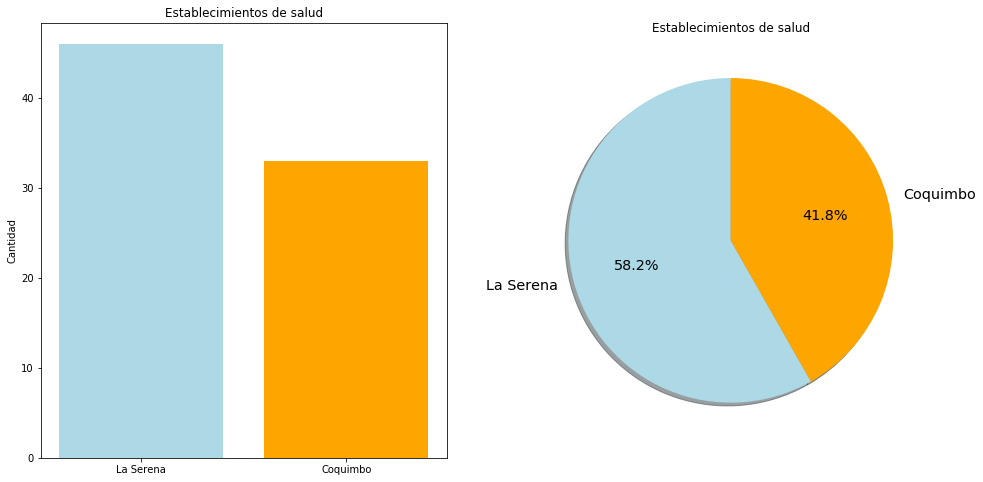

In [5]:
y_la_serena = df_salud[df_salud.Comuna == 'La Serena'].shape[0]
y_coquimbo = df_salud[df_salud.Comuna == 'Coquimbo'].shape[0]

generar_grafico_barra_y_torta(y_la_serena, y_coquimbo, 'Establecimientos de salud')

#### Observaciones

Podemos ver que La Serena contiene más establecimientos que Coquimbo, y la relación de cantidad entre ambas es 3:2 aprox, respectivamente.

### Salud: farmacias

#### Fuentes de datos

Como fuentes de información, tenemos las siguientes urls que pertenecen a un sitio web estatal:

Nos interesa el *listado de farmacias del país*, ya que contiene los datos de todas las farmacias del país.

Como los datos están disponible a través de una API, utilizaremos la librería ``requests`` para descargarlos.

#### Solicitud de datos por API pública en internet

In [90]:
url = "https://farmanet.minsal.cl/index.php/ws/getLocales"
req = requests.get(url)
req.status_code

200

#### EDA

In [91]:
len(req.text)

1577013

Como son demasiados caracteres, mostraré solo una porción de ellos:

In [92]:
req.text[:1000]

'\ufeff[{"fecha":"19-04-19","local_id":"1","local_nombre":"CRUZ VERDE ","comuna_nombre":"QUILLOTA","localidad_nombre":"QUILLOTA","local_direccion":"OHIGGINS 195, LOCAL 1","funcionamiento_hora_apertura":"09:00:00","funcionamiento_hora_cierre":"21:30:00","local_telefono":"+56332269467","local_lat":"-32.8793428949969","local_lng":"-71.2467871500868","funcionamiento_dia":"viernes","fk_region":"6","fk_comuna":"69","fk_localidad":"32"},{"fecha":"19-04-19","local_id":"2","local_nombre":"CRUZ VERDE","comuna_nombre":"LA CALERA","localidad_nombre":"LA CALERA","local_direccion":"J.J. PEREZ 202","funcionamiento_hora_apertura":"09:00:00","funcionamiento_hora_cierre":"21:00:00","local_telefono":"+56332724714","local_lat":"-32.788066282624","local_lng":"-71.1897310126255","funcionamiento_dia":"viernes","fk_region":"6","fk_comuna":"56","fk_localidad":"12"},{"fecha":"19-04-19","local_id":"3","local_nombre":"CRUZ VERDE","comuna_nombre":"LIMACHE","localidad_nombre":"LIMACHE","local_direccion":"URMENETA 9

El texto muestra que algunos datos deben ser pre-procesados para trabajarlos correctamente.

#### Data-preprocessing

In [93]:
lista_Locales = json.loads(req.text[1:])
len(lista_Locales)

3654

In [94]:
ids = [d['local_id'] for d in lista_Locales]
len(set(ids)), len(lista_Locales)

(3654, 3654)

In [95]:
def reconvertir_fecha(fecha):
    dia, mes, anho = fecha.split('-')
    if len(anho) == 2:
        anho = '20'+anho
    return "{}-{}-{}".format(anho, mes, dia)

In [96]:
def reconvertir_hora(hora):
    index = hora.index(':')
    _hora = int(hora[:index])
    if _hora >= 24:
        a = _hora - 24
        _hora = a if a > 10 else "0"+str(a)
        hora = "{}:{}".format(_hora, hora[3:])
    r_index = hora.rindex(':')
    return hora if hora == r_index else hora[:r_index]

In [97]:
sin_geo = 0
tipo_int = type(1)
farmacias = []
for _id, d in enumerate(lista_Locales):
    for k in ('local_id', 'fk_region', 'fk_comuna', 'fk_localidad'):
        lista_Locales[_id][k] = int(d[k])
    for k in ('local_nombre', 'comuna_nombre', 'localidad_nombre', 'local_direccion', 
              'local_telefono', 'funcionamiento_dia'):
        lista_Locales[_id][k] = d[k].strip()
    for k in ('funcionamiento_hora_apertura', 'funcionamiento_hora_cierre'):
        lista_Locales[_id][k] = reconvertir_hora(d[k].strip())
    lista_Locales[_id]['fecha'] = reconvertir_fecha(d['fecha'].strip())
    lat = d['local_lat'].strip().replace(',', '.')
    lng = d['local_lng'].strip().replace(',', '.')
    if lat and lng:
        while not (48 <= ord(lat[-1]) <= 57):
            lat = lat[:-1]
        while not (48 <= ord(lng[-1]) <= 57):
            lng = lng[:-1]
        lista_Locales[_id]['local_lat'] = float(lat)
        lista_Locales[_id]['local_lng'] = float(lng)
        farmacias.append(lista_Locales[_id])
    else:
        sin_geo += 1 
        #print(_id, "\t", d['local_lat'], "\t", d['local_lng'])
        ##print("\t", d)
        lista_Locales[_id]['local_lat'] = lat
        lista_Locales[_id]['local_lng'] = lng
print('Cantidad total de farmacias: {}'.format(len(ids)))
print('Cantidad de farmacias sin geolocalización: {}'.format(sin_geo))
print('Cantidad de farmacias con geolocalización: {}'.format(len(farmacias)))

Cantidad total de farmacias: 3654
Cantidad de farmacias sin geolocalización: 368
Cantidad de farmacias con geolocalización: 3286


In [98]:
farmacias[0]

{'fecha': '2019-04-19',
 'local_id': 1,
 'local_nombre': 'CRUZ VERDE',
 'comuna_nombre': 'QUILLOTA',
 'localidad_nombre': 'QUILLOTA',
 'local_direccion': 'OHIGGINS 195, LOCAL 1',
 'funcionamiento_hora_apertura': '09:00',
 'funcionamiento_hora_cierre': '21:30',
 'local_telefono': '+56332269467',
 'local_lat': -32.8793428949969,
 'local_lng': -71.2467871500868,
 'funcionamiento_dia': 'viernes',
 'fk_region': 6,
 'fk_comuna': 69,
 'fk_localidad': 32}

In [99]:
def filtrar_farmacias_por_ciudad(nombre_ciudad):
    ciudad = nombre_ciudad.upper()
    listado = []
    for local in farmacias:
        if local['comuna_nombre'] == ciudad:
            latitud = local['local_lat']
            longitud = local['local_lng']
            listado.append([latitud, longitud])
    return np.array(listado)

In [100]:
farmacias_la_serena = filtrar_farmacias_por_ciudad('La Serena')
farmacias_coquimbo = filtrar_farmacias_por_ciudad('Coquimbo')

print("Cantidad de farmacias geolocalizables en La Serena  : ", farmacias_la_serena.shape[0])
print("Cantidad de farmacias geolocalizables en La Coquimbo: ", farmacias_coquimbo.shape[0])

Cantidad de farmacias geolocalizables en La Serena  :  32
Cantidad de farmacias geolocalizables en La Coquimbo:  22


#### Comparación

In [17]:
def ubicar_en_mapa(ubicacion_central, ubicaciones, color):
    """
    ubicacion_central: list() de la forma [latitud, longitud], que indica dónde se centrará el mapa
    ubicaciones:  2D numpy array, contiene el array de ubicaciones
    Return: el mapa
    """
    m = folium.Map(
        location=ubicacion_central,
        zoom_start=13,
        #tiles='Stamen Toner',
    )
    for i in range(ubicaciones.shape[0]):
        tooltip = str(ubicaciones[i])[1:-1]
        folium.Marker(
            ubicaciones[i], 
            popup="<b>"+tooltip+"</b>", 
            tooltip=tooltip,
            icon=folium.Icon(color=color)
        ).add_to(m)
    return m

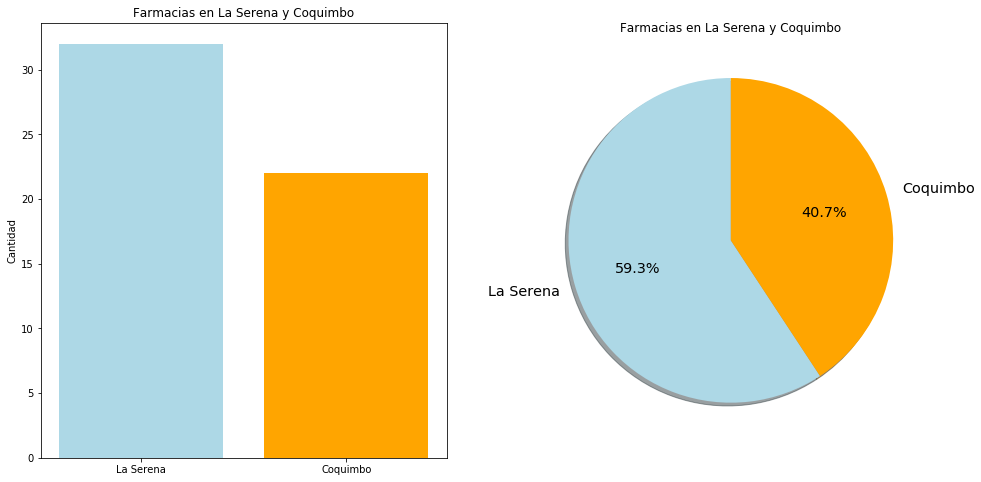

In [18]:
y_la_serena = farmacias_la_serena.shape[0]
y_coquimbo = farmacias_coquimbo.shape[0]

generar_grafico_barra_y_torta(y_la_serena, y_coquimbo, 'Farmacias en La Serena y Coquimbo')

La Serena tiene un 50% más de farmacias que la que tiene Coquimbo

#### Georeferenciación

##### Farmacias en La Serena

In [19]:
ubicar_en_mapa(
    [-29.9007694,-71.2509879], # La Serena
    filtrar_farmacias_por_ciudad('La Serena'),
    'blue'
)

##### Farmacias en Coquimbo

In [20]:
ubicar_en_mapa(
    [-29.9704668,-71.3337099], # Coquimbo
    filtrar_farmacias_por_ciudad('Coquimbo'),
    'red'
)

#### Observaciones

* hay una mayor cantidad de Farmacias en La Serena que en Coquimbo, es decir, hay una mayor disponibilidad en cuanto a cantidad (la relación es 3:2, a favor de La Serena)
* las farmacias en La Serena están más cercanas entre sí que las de Coquimbo, es decir, hay una menor disponibilidad en cuanto a ubicación geográfica

## Educación

Para el ámbito de la educación, descargaremos un conjunto de datos disponibles en formato ``CSV``, asociados a los establecimientos educacionales en el país.

In [21]:
#df_educacion = pd.read_csv('datasets/educacion/temp_5146756168481416367.csv')
df_educacion = pd.read_csv('datasets/educacion/educacion.tar.gz')

### EDA

In [22]:
print(df_educacion.shape)
df_educacion.head(3)

(16044, 34)


,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,...,ENS_06,ENS_07,ENS_08,ENS_09,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL
0,2018,1,9,LICEO POLITECNICO ARICA,NaN,69010100.0,1,15,151,15101,...,863,0,0,0,1,1,2,NaN,GRATUITO,GRATUITO
1,2018,2,7,PARVULARIO LAS ESPIGUITAS,NaN,69010100.0,1,15,151,15101,...,0,0,0,0,1,1,2,NaN,GRATUITO,GRATUITO
2,2018,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,NaN,69010100.0,1,15,151,15101,...,0,0,0,0,1,1,1,NaN,GRATUITO,GRATUITO


In [23]:
df_educacion.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'MRUN', 'RUT_SOSTENEDOR',
       'P_JURIDICA', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD',
       'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD', 'COD_DEPE',
       'COD_DEPE2', 'RURAL_RBD', 'LATITUD', 'LONGITUD', 'CONVENIO_PIE',
       'ENS_01', 'ENS_02', 'ENS_03', 'ENS_04', 'ENS_05', 'ENS_06', 'ENS_07',
       'ENS_08', 'ENS_09', 'MATRICULA', 'ESTADO_ESTAB', 'ORI_RELIGIOSA',
       'ORI_OTRO_GLOSA', 'PAGO_MATRICULA', 'PAGO_MENSUAL'],
      dtype='object')

In [24]:
# nombres de ciudades
df_educacion.NOM_COM_RBD.unique()[:3]

array(['ARICA', 'CAMARONES', 'PUTRE'], dtype=object)

In [25]:
df_educacion.LATITUD[:2]

0    -18,48727417
1    -18,46986198
Name: LATITUD, dtype: object

In [26]:
df_educacion.LONGITUD[:2]

0    -70,29473877
1    -70,30275726
Name: LONGITUD, dtype: object

Hay varias columnas, pero solo nos interesa las siguiente:

- ``NOM_COM_RBD``: nombre de la comuna (ciudad)
- ``LATITUD``: latitud
- ``LONGITUD``: longitud
- ``PAGO_MATRICULA``: indica si la matrícula es gratuita o de pago
- ``PAGO_MENSUAL``: indica si las mensualidades son gratuitas o de pago

### Data-preprocessing

#### Filtrado de establecimientos para La Serena y Coquimbo

In [27]:
columnas = ['NOM_COM_RBD', 'LATITUD', 'LONGITUD', 'PAGO_MATRICULA', 'PAGO_MENSUAL']
df_la_serena = df_educacion[df_educacion.NOM_COM_RBD == 'LA SERENA'][columnas]
df_coquimbo = df_educacion[df_educacion.NOM_COM_RBD == 'COQUIMBO'][columnas]
print(df_la_serena.shape)
print(df_coquimbo.shape)

(244, 5)
(199, 5)


In [28]:
# precios de matrícula
df_la_serena.PAGO_MATRICULA.unique()

array(['SIN INFORMACION', 'GRATUITO', '$1.000 A $10.000',
       'MAS DE $100.000', '$50.001 A $100.000', '$10.001 A $25.000'],
      dtype=object)

In [29]:
# precios de mensualidades
df_la_serena.PAGO_MENSUAL.unique()

array(['SIN INFORMACION', 'GRATUITO', '$25.001 A $50.000',
       '$50.001 A $100.000', 'MAS DE $100.000', '$10.001 A $25.000'],
      dtype=object)

#### Transformación de latitud y longitud a ``np.float64``

In [30]:
df_la_serena.LATITUD = df_la_serena.LATITUD.str.replace(',', '.').astype(np.float64)
df_la_serena.LONGITUD = df_la_serena.LONGITUD.str.replace(',', '.').astype(np.float64)

df_coquimbo.LATITUD = df_coquimbo.LATITUD.str.replace(',', '.').astype(np.float64)
df_coquimbo.LONGITUD = df_coquimbo.LONGITUD.str.replace(',', '.').astype(np.float64)

Las columnas que nos interesan son:
* ``NOM_COM_RBD``: nombre de la comuna (ciudad)
* ``LATITUD`` y ``LONGITUD``: latitud y longitud
* ``PAGO_MATRICULA`` y ``PAGO_MENSUAL``: indican si son gratuitos, tienen un precio o no hay información, en lo que respecta al pago de la matrícula (ingreso al establecimiento) y al pago mensual, respectivamente

Las comparaciones a realizar son:

* cantidad total de establecimientos
* cantidad de establecimientos gratuitos vs no gratuitos en matrícula
* cantidad de establecimientos gratuitos vs no gratuitos en pago mensual

### Comparaciones

#### Cantidad total de establecimientos, para La Serena y Coquimbo

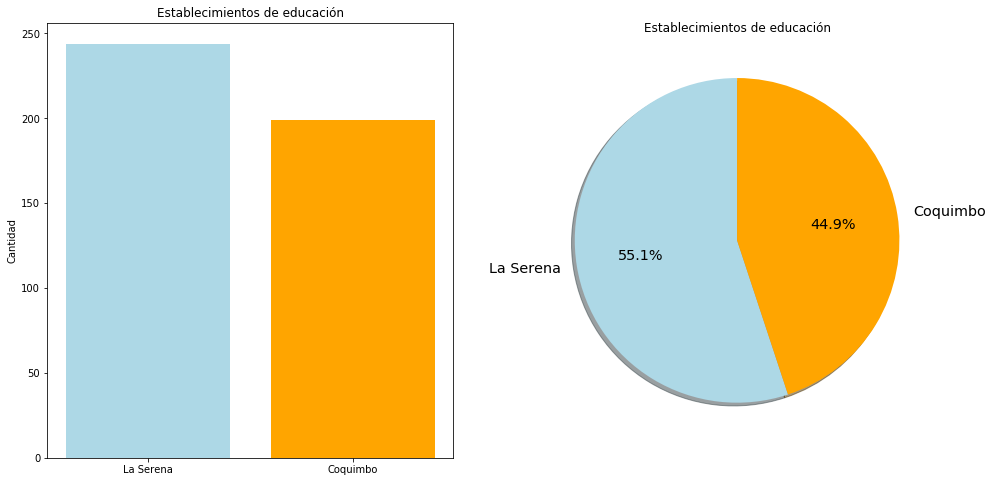

In [31]:
y_la_serena = df_la_serena.shape[0]
y_coquimbo = df_coquimbo.shape[0]

generar_grafico_barra_y_torta(y_la_serena, y_coquimbo, 'Establecimientos de educación')

Hay más establecimientos educacionales en La Serena que en Coquimbo, sin embargo, la diferencia no es significativa.

#### Cantidad de establecimientos gratuitos, para la Serena y Coquimbo

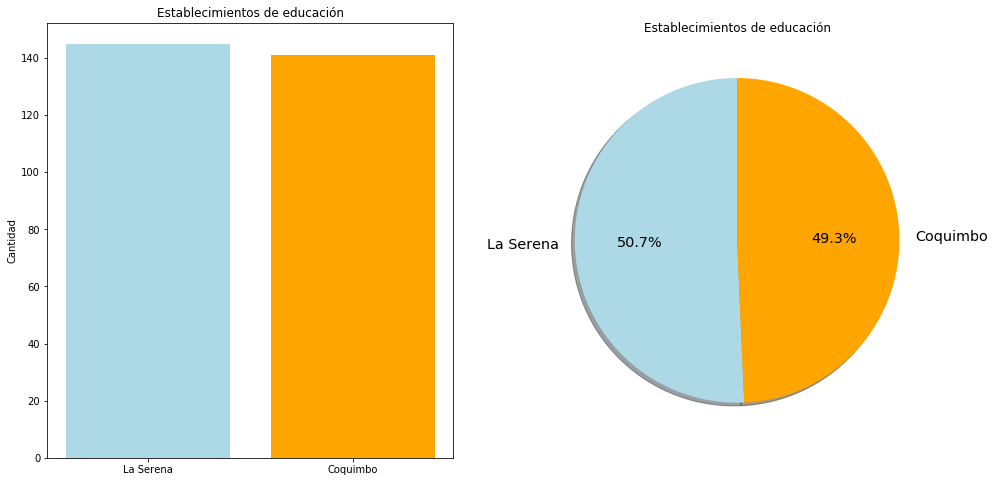

In [32]:
y_la_serena = df_la_serena[df_la_serena.PAGO_MATRICULA == 'GRATUITO'].shape[0]
y_coquimbo = df_coquimbo[df_coquimbo.PAGO_MATRICULA == 'GRATUITO'].shape[0]

generar_grafico_barra_y_torta(y_la_serena, y_coquimbo, 'Establecimientos de educación')

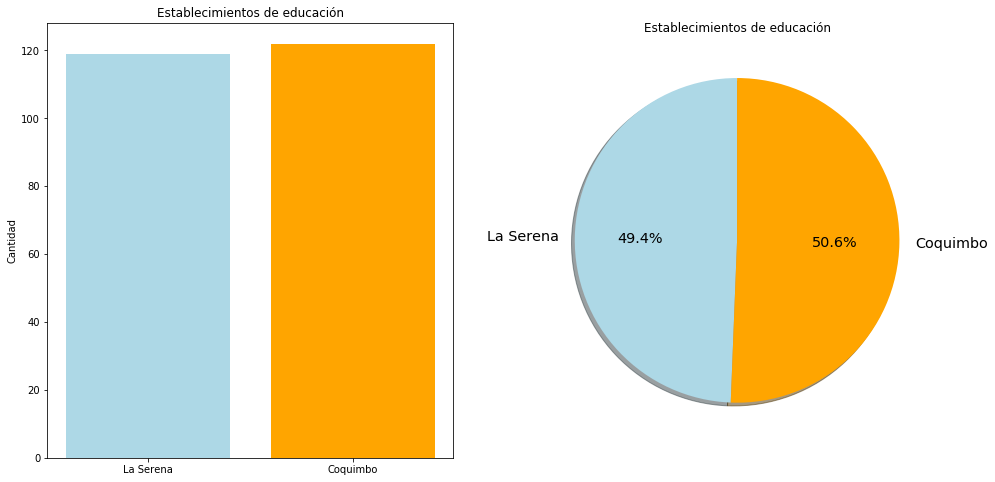

In [33]:
y_la_serena = df_la_serena[df_la_serena.PAGO_MENSUAL == 'GRATUITO'].shape[0]
y_coquimbo = df_coquimbo[df_coquimbo.PAGO_MENSUAL == 'GRATUITO'].shape[0]

generar_grafico_barra_y_torta(y_la_serena, y_coquimbo, 'Establecimientos de educación')

No hay diferencias significativas en cuanto al pago gratuito de la matrícula y la mensualidad

#### Cantidad de establecimientos no gratuitos, para La Serena y Coquimbo

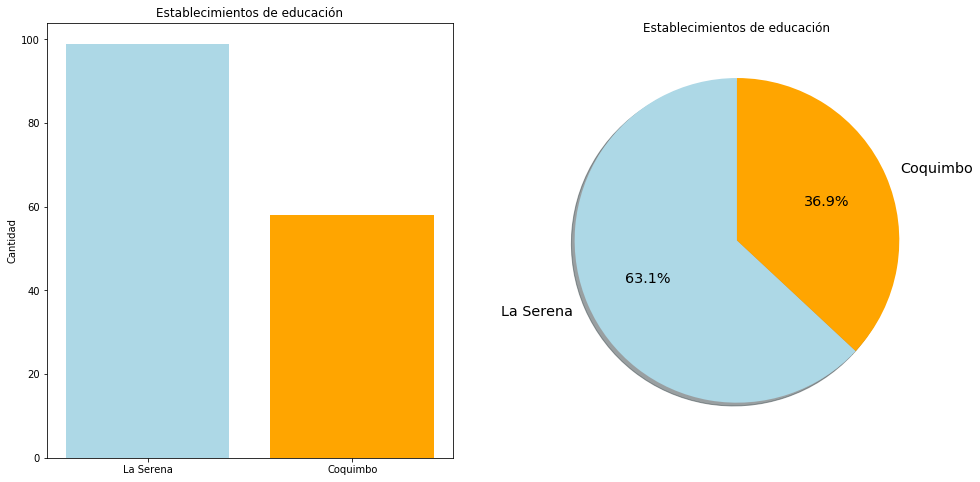

In [34]:
y_la_serena = df_la_serena[df_la_serena.PAGO_MATRICULA != 'GRATUITO'].shape[0]
y_coquimbo = df_coquimbo[df_coquimbo.PAGO_MATRICULA != 'GRATUITO'].shape[0]

generar_grafico_barra_y_torta(y_la_serena, y_coquimbo, 'Establecimientos de educación')

In [35]:
round(y_la_serena / y_coquimbo, 2)

1.71

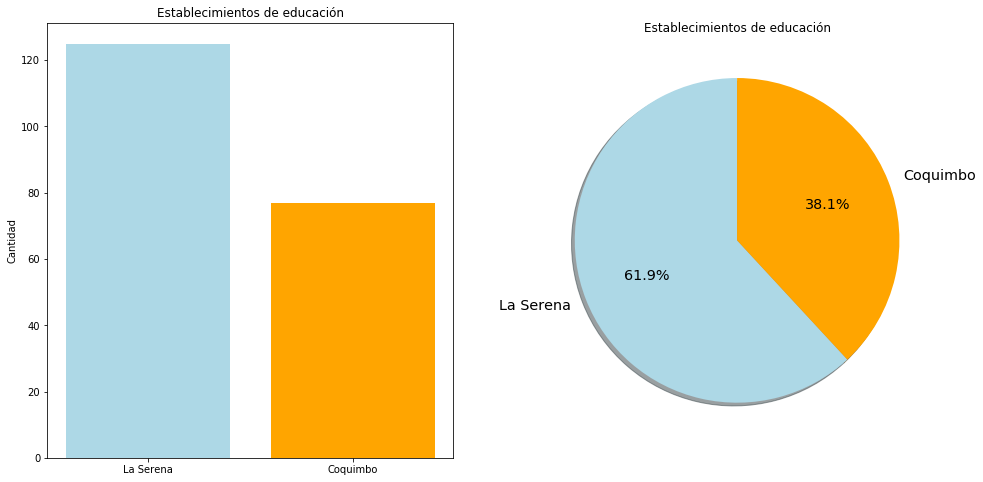

In [36]:
y_la_serena = df_la_serena[df_la_serena.PAGO_MENSUAL != 'GRATUITO'].shape[0]
y_coquimbo = df_coquimbo[df_coquimbo.PAGO_MENSUAL != 'GRATUITO'].shape[0]

generar_grafico_barra_y_torta(y_la_serena, y_coquimbo, 'Establecimientos de educación')

In [37]:
round(y_la_serena / y_coquimbo, 2)

1.62

#### Geolocalización

In [38]:
# La Serena
total = df_la_serena.shape[0]
df_la_serena_geo = df_la_serena[pd.notna(df_la_serena.LATITUD) & pd.notna(df_la_serena.LONGITUD)]
round(df_la_serena_geo.shape[0] / total, 2)

0.7

In [39]:
# Coquimbo
total = df_coquimbo.shape[0]
df_coquimbo_geo = df_coquimbo[pd.notna(df_coquimbo.LATITUD) & pd.notna(df_coquimbo.LONGITUD)]
round(df_coquimbo_geo.shape[0] / total, 2)

0.72

A partir de lo anterior, se desprende que:

* En La Serena, solo un 70% de los establecimientos pueden ser georeferenciados, debido a la inexistencia de los datos
* En Coquimbo, solo un 72% de los establecimientos pueden ser georeferenciados, debido a la inexistencia de los datos

In [40]:
ubicaciones_la_serena = df_la_serena_geo[['LATITUD', 'LONGITUD']].get_values()
ubicaciones_coquimbo = df_coquimbo_geo[['LATITUD', 'LONGITUD']].get_values()

print(ubicaciones_la_serena.shape)
print(ubicaciones_coquimbo.shape)

(172, 2)
(144, 2)


In [41]:
ubicar_en_mapa(
    [-29.9007694,-71.2509879], # La Serena
    ubicaciones_la_serena,
    'blue',
)

In [42]:
ubicar_en_mapa(
    [-29.9704668,-71.3337099], # Coquimbo
    ubicaciones_coquimbo,
    'red'
)

Dadas las ubicaciones, podemos inferir que:

* en La Serena, existen 2 clusters
* en Coquimbo, existen 3 clusters

### Observaciones

Se puede apreciar que:

* en totalidad, no hay diferencias sustanciales
* en gratuidad, no hay diferencias sustanciales
* **en no gratuidad, si hay diferencias importantes**: hay una mayor cantidad de establecimientos eduacionales en tanto en el pago de la matrícula como en el pago de la mensualidad. ***La Serena tiene entre un 60% y 70% más aprox. de establecimientos educacionales que Coquimbo***.

## Delitos

En esta sección, se analizarán los datos asociados a estadísticas delictuales de La Serena y Coquimbo.

Se pueden obtener los datos de la Región de Coquimbo (que incluye La Serena y Coquimbo), desde la siguiente página web estatal: http://www.seguridadpublica.gov.cl/estadisticas-delictuales-region-de-coquimbo/
    
Como los datos no están disponibles a través de un archivo descargable, se deben copiar manualmente y guardar en un archivo de texto plano.

### EDA + Data-preprocessing

In [43]:
def preparar_archivo(ruta):
    contenido = None
    with open(ruta) as archivo:
        contenido = archivo.read()
    contenido = contenido.replace('.', '').replace(',', '.')
    with open(ruta, 'w') as archivo:
        for linea in contenido.splitlines():
            linea_aux = linea.strip()
            if linea_aux:
                linea_limpia = ''
                for valor in linea_aux.split('\t'):
                    linea_limpia += valor.strip() + '\t'
                archivo.write(linea_limpia.strip() + '\n')
        #archivo.write(contenido)

In [44]:
preparar_archivo('datasets/delitos/La-Serena.txt')
preparar_archivo('datasets/delitos/Coquimbo.txt')

In [45]:
df_la_serena = pd.read_csv('datasets/delitos/La-Serena.txt', sep='\t')
df_la_serena

,Delitos Comuna de La Serena,2012,2013,2014,2015,2016
0,Total DMCS,35466,36866,36216,34242,34232
1,Robo con violencia o intimidación,2181,2187,2864,2650,2212
2,Robo por sorpresa,1006,1109,1500,1797,1605
3,Robo de vehículo motorizado,1157,1261,1534,2198,1848
4,Robo de objeto de o desde vehículo,2769,3296,3038,3154,3650
5,Robo en lugar habitado,5597,5916,5990,5950,5243
6,Robo en lugar no habitado,2213,2691,2751,2642,3591
7,Otros robos con fuerza,214,365,471,431,493
8,Hurtos,14504,14990,13483,11272,11372
9,Lesiones menos graves graves o gravísimas,1129,815,881,755,690


In [46]:
df_coquimbo = pd.read_csv('datasets/delitos/Coquimbo.txt', sep='\t')
df_coquimbo

,Delitos Comuna de Coquimbo,2012,2013,2014,2015,2016
0,Total DMCS,34179,31711,33716,30895,31820
1,Robo con violencia o intimidación,2490,2360,2868,2983,3041
2,Robo por sorpresa,1471,1468,1499,1526,1493
3,Robo de vehículo motorizado,1234,852,962,1363,1169
4,Robo de objeto de o desde vehículo,3046,3194,4481,3536,4126
5,Robo en lugar habitado,6283,6156,6522,5761,5997
6,Robo en lugar no habitado,2827,2440,2649,2769,2843
7,Otros robos con fuerza,209,201,144,150,248
8,Hurtos,9771,8712,9022,7934,7675
9,Lesiones menos graves graves o gravísimas,1352,1115,979,1012,993


In [47]:
df_coquimbo[df_coquimbo['Delitos Comuna de Coquimbo'] == 'Hurtos']

,Delitos Comuna de Coquimbo,2012,2013,2014,2015,2016
8,Hurtos,9771,8712,9022,7934,7675


3 filas a tener en cuenta:

* **Total DMCS**: Total Delitos Mayor Connotación Social. Esta categoría es la sumatoria de los índices 1 al 12, inclusive.
* **Hurtos**: Es la subcategoría de mayor valor bajo la cetegoría DMCS.
* **VIF**: Violencia Intra Familiar. Es una categoría.

Solo se tendrá en consideración los datos más recientes, es decir, los datos del año 2016.

### Comparaciones

#### Categoría DMCS: Delitos de Mayor Connotación Social

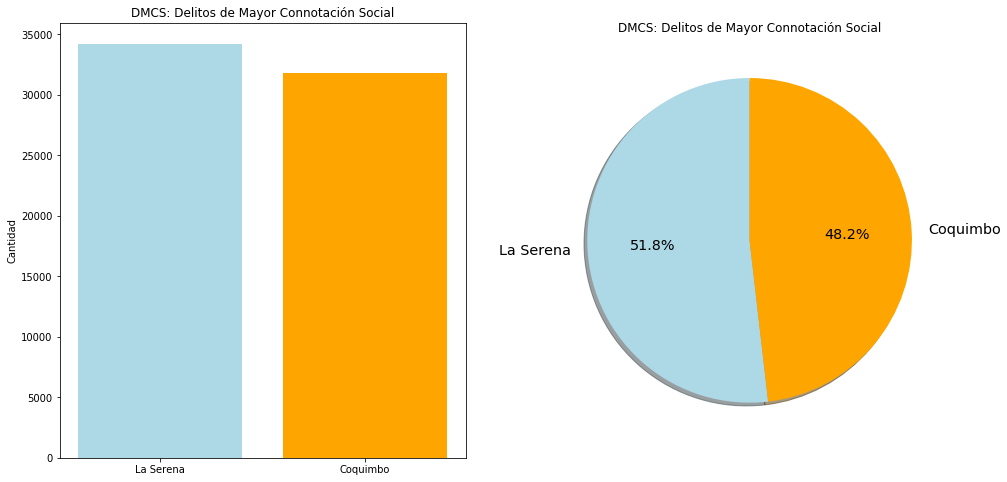

In [48]:
y_la_serena = df_la_serena['2016'][0]
y_coquimbo = df_coquimbo['2016'][0]

generar_grafico_barra_y_torta(y_la_serena, y_coquimbo, 'DMCS: Delitos de Mayor Connotación Social')

La diferencia en cuanto a la cantidad de DMCS no es significativa.

#### Subcategorías de DMCS

In [49]:
def generar_grafico_linea(x_labels, y_la_serena, y_coquimbo, titulo, rotar=True):
    x = np.arange(len(x_labels))    

    plt.figure(figsize=(16,8))
    plt.plot(x, y_la_serena, label='La Serena', color='lightblue')
    plt.plot(x, y_coquimbo, label='Coquimbo', color='orange')
    plt.xticks(x, x_labels, rotation=90 if rotar else 0)
    plt.legend(loc='upper right')
    plt.title(titulo)

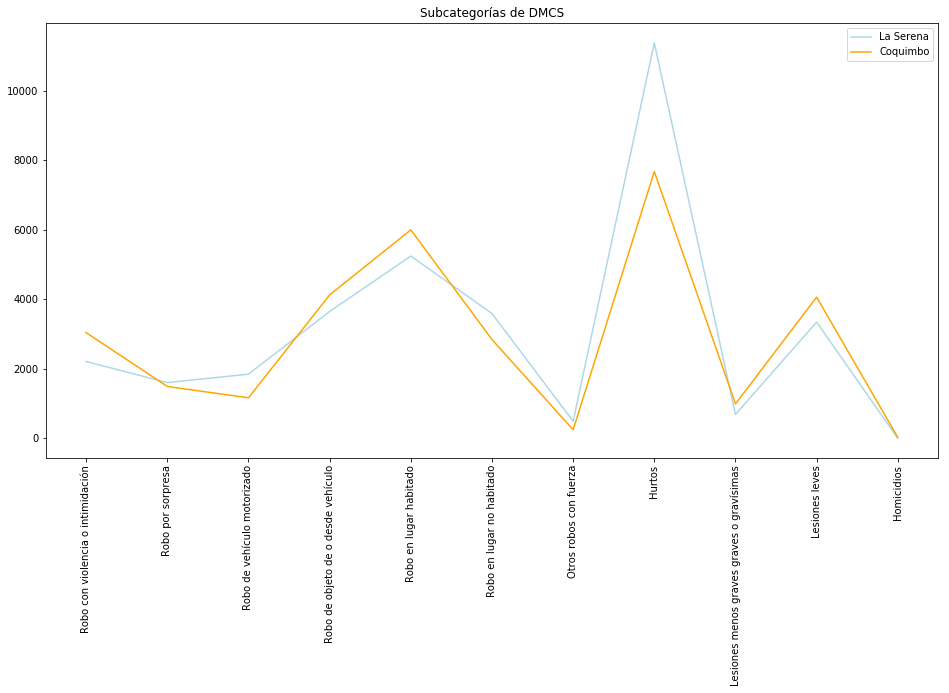

In [50]:
y_la_serena = df_la_serena['2016'][1:12]
y_coquimbo = df_coquimbo['2016'][1:12]

x_labels = df_la_serena['Delitos Comuna de La Serena'][1:12].get_values()
x_labels[8] = x_labels[8].replace('.', '\n')

generar_grafico_linea(x_labels, y_la_serena, y_coquimbo, 'Subcategorías de DMCS')

Se puede apreciar que la mayor diferencia se encuentra en Hurtos, afectando de manera negativa a la ciudad de La Serena.

In [51]:
round(df_la_serena['2016'][8] / df_coquimbo['2016'][8], 2)

1.48

La cifra anterior implica que en la subcategoría hurtos, para el año 2016 en La Serena hubo 48% de hurtos más de lo que hubo en Coquimbo

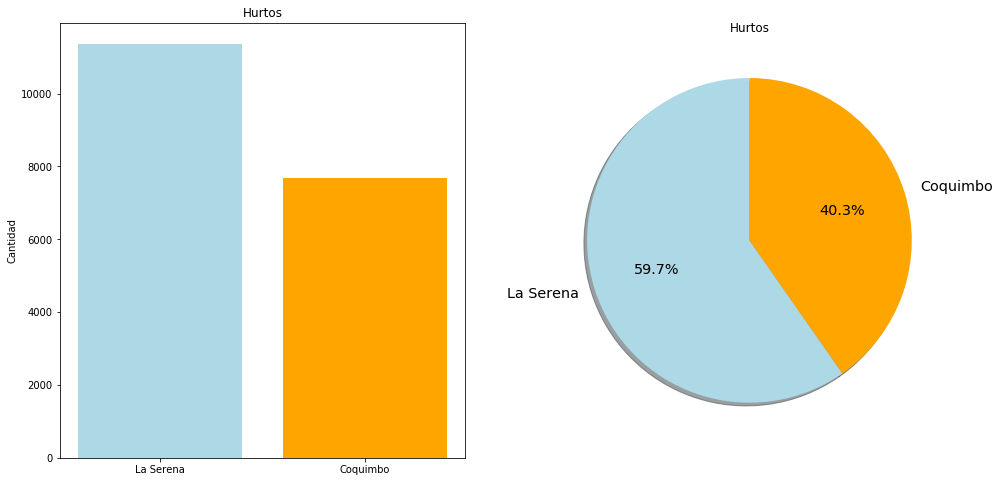

In [52]:
y_la_serena = df_la_serena['2016'][8]
y_coquimbo = df_coquimbo['2016'][8]

generar_grafico_barra_y_torta(y_la_serena, y_coquimbo, 'Hurtos')

Ambos gráficos confirman lo anteriormente dicho en relación a los hurtos.

#### VIF: Violencia Intra Familiar

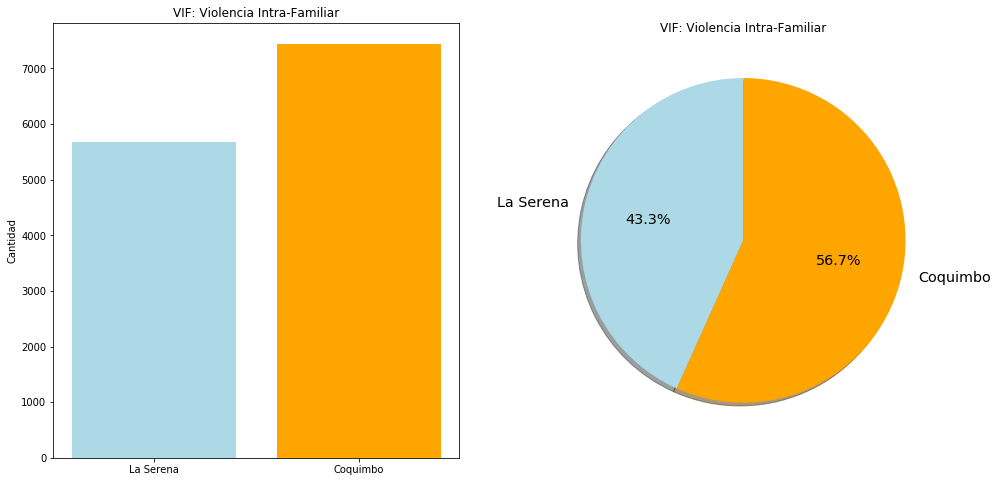

In [53]:
y_la_serena = df_la_serena['2016'][13]
y_coquimbo = df_coquimbo['2016'][13]

generar_grafico_barra_y_torta(y_la_serena, y_coquimbo, 'VIF: Violencia Intra-Familiar')

In [54]:
round(y_coquimbo / y_la_serena, 2)

1.31

La cifra anterior implica que en la categoría VIF, para el año 2016 en Coquimbo hubo 31% más de lo que hubo en La Serena.

### Observaciones

* En la categoría DMCS, La Serena es muy similar a Coquimbo
* **En la subcategoría Hurtos, La Serena está sobre Coquimbo** por un 50%, es decir, hay mayor cantidad de delitos sin violencia en La Serena.
* **En categoría VIF, Coquimbo está sobre La Serena** por un 30%, es decir, hay mayor cantidad de situaciones de Violencia IntraFamiliar en Coquimbo

## Empleo

En esta sección se analizará los datos de empleabilidad de La Serena y Coquimbo, entre los meses Enero y Marzo de este año (2019).

Los datos se pueden descargar en formato ``CSV`` desde la siguiente página web estatal: https://www.ine.cl/estadisticas/laborales/ene

La descripción de cada una de las columnas aparece en el mismo link.

In [55]:
#df_empleo = pd.read_csv('datasets/empleo/ENE 2019 01 DEF.csv', sep=';')
df_empleo = pd.read_csv('datasets/empleo/empleo.tar.gz', sep=';')

### EDA

In [56]:
print(df_empleo.shape)
df_empleo.head()

(105264, 143)


,ano_trimestre,mes_central,id_identificacion,idrph,id_directorio,region,region_15,estrato,estrato_15,tipo,...,categoria_ocupacion,habituales,efectivas,cine,r_p_rev4cl_caenes,sector,ocup_form,tramo_edad,activ,fact
0,2019,1,252492,1200633,12350,6,6,6079,6079,3,...,5,4,4,5,20,3,2,4,1,"24,0340554014437"
1,2019,1,257697,1200669,24005,15,15,15011,15011,1,...,3,45,45,6,9,1,1,3,1,"93,9736443751678"
2,2019,1,257707,1200708,12349,6,6,6039,6039,3,...,0,,,5,,0,0,4,3,"161,970423932325"
3,2019,1,257713,1200733,25151,5,5,5111,5111,1,...,1,45,45,7,13,1,1,8,1,"88,078877028103"
4,2019,1,257728,1200783,25151,5,5,5111,5111,1,...,0,,,5,,0,0,11,3,"88,8206496373817"


In [57]:
for c in df_empleo.columns:
    print(c, end='\t')

ano_trimestre	mes_central	id_identificacion	idrph	id_directorio	region	region_15	estrato	estrato_15	tipo	r_p_c	r_p_c_15	ano_encuesta	mes_encuesta	hogar	nro_linea	edad	sexo	parentesco	curso	nivel	termino_nivel	est_conyugal	proveedor	nacionalidad	a1	a2	a3	a4	a5	a6	a6_otro	a7	a8	b1	b2	b3	b4	b5	b6	b7a_1	b7a_2	b7a_3	b7b_1	b7b_2	b7b_3	b7b_4	b8	b9	b10	b11	b12	b13_rev4cl_caenes	i1	i2	i3	i3_v	i4	i5	i6	i7	b14_rev4cl_caenes	b15_1	b15_2	b16	b16_otro	b17_mes	b17_ano	b18_region	b18_varias	b18_codigo	b19	c1	c2_1_1	c2_1_2	c2_1_3	c2_2_1	c2_2_2	c2_2_3	c3_1	c3_2	c3_3	c4	c5	c6	c7	c8	c9	c10	c11	c12	c13	e1	e2	e3_1	e3_2	e3_3	e3_4	e3_5	e3_6	e3_7	e3_8	e3_9	e3_10	e3_11	e3_12	e3_total	e4	e5	e5_dia	e5_sem	e5_mes	e5_ano	e6_mes	e6_ano	e7	e8	e9	e10	e11	e12	e13	e14_mes	e14_ano	e15_meses	e15_anos	e16	e17	e18_rev4cl_caenes	e19	e19_otro	cae_general	cae_especifico	categoria_ocupacion	habituales	efectivas	cine	r_p_rev4cl_caenes	sector	ocup_form	tramo_edad	activ	fact	

In [58]:
tipos = df_empleo.dtypes
tipos[tipos == np.int64]

ano_trimestre          int64
mes_central            int64
id_identificacion      int64
idrph                  int64
id_directorio          int64
region                 int64
region_15              int64
estrato                int64
estrato_15             int64
tipo                   int64
r_p_c                  int64
r_p_c_15               int64
ano_encuesta           int64
mes_encuesta           int64
hogar                  int64
nro_linea              int64
edad                   int64
sexo                   int64
parentesco             int64
curso                  int64
nivel                  int64
termino_nivel          int64
est_conyugal           int64
proveedor              int64
nacionalidad           int64
cae_general            int64
cae_especifico         int64
categoria_ocupacion    int64
cine                   int64
sector                 int64
ocup_form              int64
dtype: object

### Data-preprocessing

In [59]:
df_empleo_la_serena = df_empleo[df_empleo.r_p_c == 4101]
df_empleo_coquimbo = df_empleo[df_empleo.r_p_c == 4102]

print('Cantidad de encuestados en La Serena: {}'.format(df_empleo_la_serena.shape[0]))
print('Cantidad de encuestados en Coquimbo : {}'.format(df_empleo_coquimbo.shape[0]))

Cantidad de encuestados en La Serena: 1288
Cantidad de encuestados en Coquimbo : 986


Acá podemos ver que hay distintas cantidad de personas encuestadas, por lo tanto, las comparaciones a realizar se harán en base a porcentajes y no en base a cantidades.

### Comparaciones

#### Tipos de jornada

* 1: Jornada completa
* 2: Jornada parcial

In [60]:
def generar_grafico_barras(x_labels, y_la_serena, y_coquimbo, titulo):
    plt.figure(figsize=(10,5))

    # width of the bars
    barWidth = 0.25

    r1 = np.arange(len(y_la_serena))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, y_la_serena, width=barWidth, color='lightblue', label='La Serena')
    plt.bar(r2, y_coquimbo, width=barWidth, color='orange', label='Coquimbo')

    plt.xticks([r + barWidth*0.5 for r in range(len(y_la_serena))], x_labels)
    plt.ylabel('Porcentaje')
    plt.legend()
    plt.title(titulo);

In [61]:
def empleo_porcentual(df, nombre_columna, indices_filas_a_borrar=None):
    df_aux = (
        df.groupby(nombre_columna)
            .size()
            .reset_index()
            .rename(columns={0: 'total'})
    )
    if indices_filas_a_borrar:
        df_aux = df_aux.drop(indices_filas_a_borrar)
    total = np.sum(df_aux.total)
    return np.round(df_aux.total / total, 3) * 100

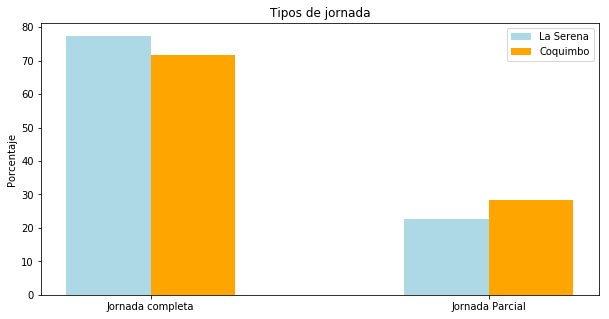

In [62]:
nombre_columna = 'c1'
titulo = 'Tipos de jornada'
x_labels = np.array(['Jornada completa', 'Jornada Parcial'])
indices_filas_a_borrar = [0]

y_la_serena = empleo_porcentual(df_empleo_la_serena, nombre_columna, indices_filas_a_borrar)
y_coquimbo = empleo_porcentual(df_empleo_coquimbo, nombre_columna, indices_filas_a_borrar)

generar_grafico_barras(x_labels, y_la_serena, y_coquimbo, titulo)

#### Categorías en ocupación

In [63]:
def generar_diccionario(ids_codigos, df, columna):
    d = {id_:0 for id_ in ids_codigos}
    df_aux = (
        df.groupby(columna)
            .size()
            .reset_index()
            .rename(columns={0: 'total'})
    )
    d_updated = {fila[0]:fila[1] for index, fila in df_aux.iterrows()}
    d.update(d_updated)
    return d


def calcular_porcentajes(ids_codigos, df, columna):
    d = generar_diccionario(ids_codigos, df, columna)
    valores = np.array([d[k] for k in sorted(ids_codigos)])
    total = np.sum(valores)
    return np.round(valores / total, 3) * 100

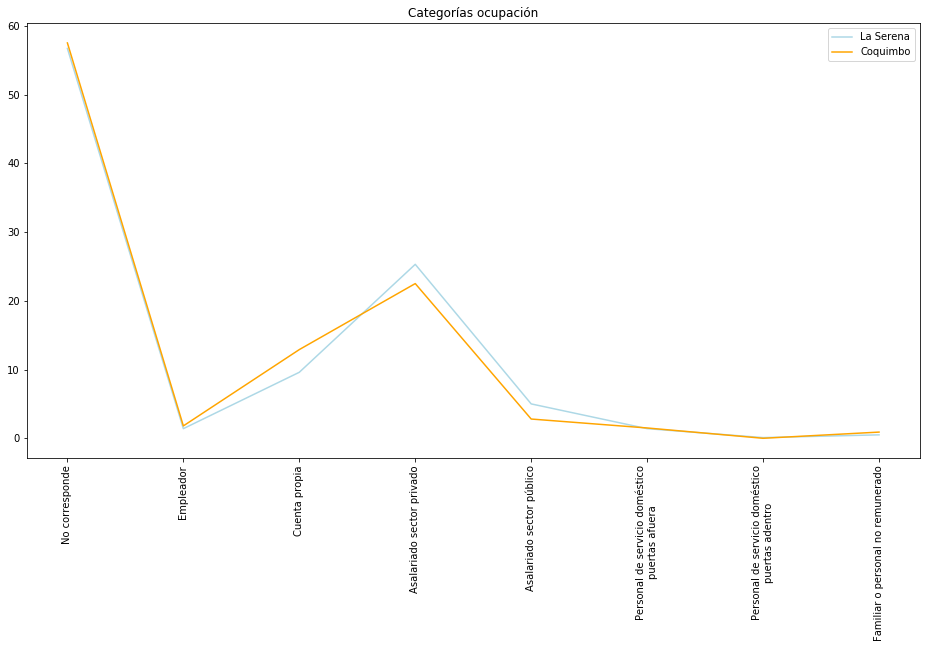

In [64]:
columna = 'categoria_ocupacion'
titulo = 'Categorías ocupación'
codigos = {
    0: 'No corresponde',
    1: 'Empleador',
    2: 'Cuenta propia',
    3: 'Asalariado sector privado',
    4: 'Asalariado sector público',
    5: 'Personal de servicio doméstico\npuertas afuera',
    6: 'Personal de servicio doméstico\npuertas adentro',
    7: 'Familiar o personal no remunerado',
}

ids_codigos = sorted(codigos.keys())
x_labels = [codigos[k] for k in ids_codigos]
y_la_serena = calcular_porcentajes(ids_codigos, df_empleo_la_serena, columna)
y_coquimbo = calcular_porcentajes(ids_codigos, df_empleo_coquimbo, columna)

generar_grafico_linea(x_labels, y_la_serena, y_coquimbo, titulo)

#### Clasificación Internacional de Nivel Educacional (CINE)

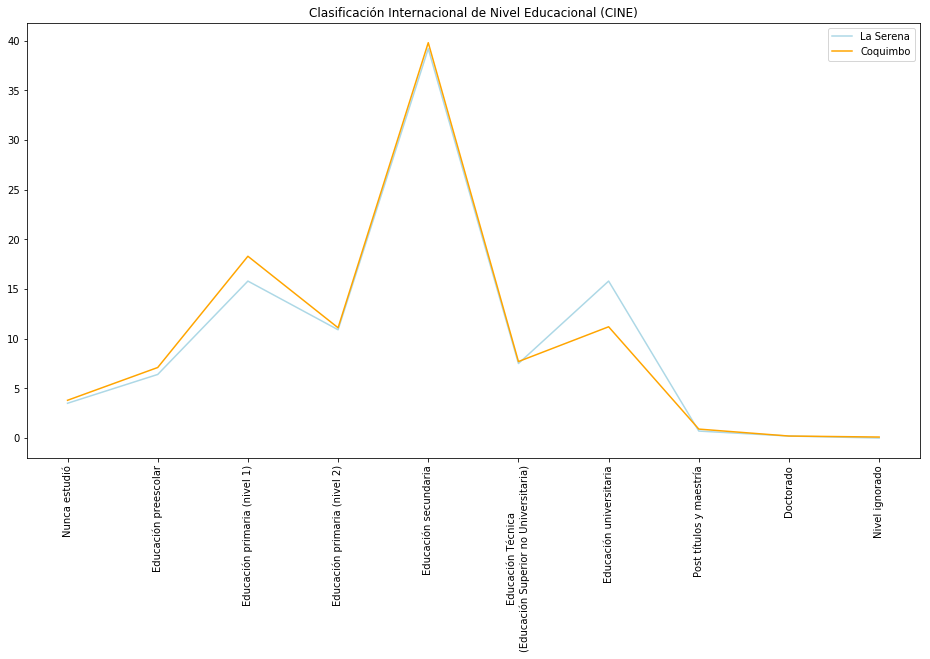

In [65]:
columna = 'cine'
titulo = 'Clasificación Internacional de Nivel Educacional (CINE)'
codigos = {
    1: 'Nunca estudió',
    2: 'Educación preescolar',
    3: 'Educación primaria (nivel 1)',
    4: 'Educación primaria (nivel 2)',
    5: 'Educación secundaria',
    6: 'Educación Técnica\n(Educación Superior no Universitaria)',
    7: 'Educación universitaria',
    8: 'Post títulos y maestría',
    9: 'Doctorado',
    999: 'Nivel ignorado',
}

ids_codigos = sorted(codigos.keys())
x_labels = [codigos[k] for k in ids_codigos]
y_la_serena = calcular_porcentajes(ids_codigos, df_empleo_la_serena, columna)
y_coquimbo = calcular_porcentajes(ids_codigos, df_empleo_coquimbo, columna)

generar_grafico_linea(x_labels, y_la_serena, y_coquimbo, titulo)

#### Condición de Actividad Económica General

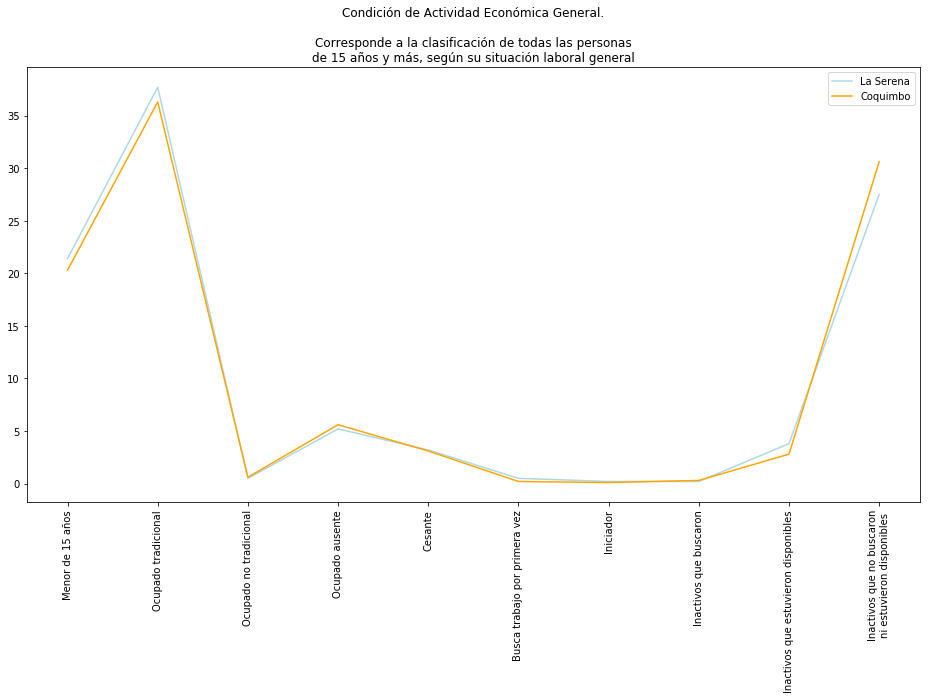

In [66]:
columna = 'cae_general'
titulo = (
    'Condición de Actividad Económica General.' + '\n\n'
    'Corresponde a la clasificación de todas las personas' + '\n'
    'de 15 años y más, según su situación laboral general'
)
codigos = {
    0: 'Menor de 15 años',
    1: 'Ocupado tradicional',
    2: 'Ocupado no tradicional',
    3: 'Ocupado ausente',
    4: 'Cesante',
    5: 'Busca trabajo por primera vez',
    6: 'Iniciador',
    7: 'Inactivos que buscaron',
    8: 'Inactivos que estuvieron disponibles',
    9: 'Inactivos que no buscaron\nni estuvieron disponibles',
}

ids_codigos = sorted(codigos.keys())
x_labels = [codigos[k] for k in ids_codigos]
y_la_serena = calcular_porcentajes(ids_codigos, df_empleo_la_serena, columna)
y_coquimbo = calcular_porcentajes(ids_codigos, df_empleo_coquimbo, columna)

generar_grafico_linea(x_labels, y_la_serena, y_coquimbo, titulo)

#### Actividad principal: Días a la semana trabajados habitualmente

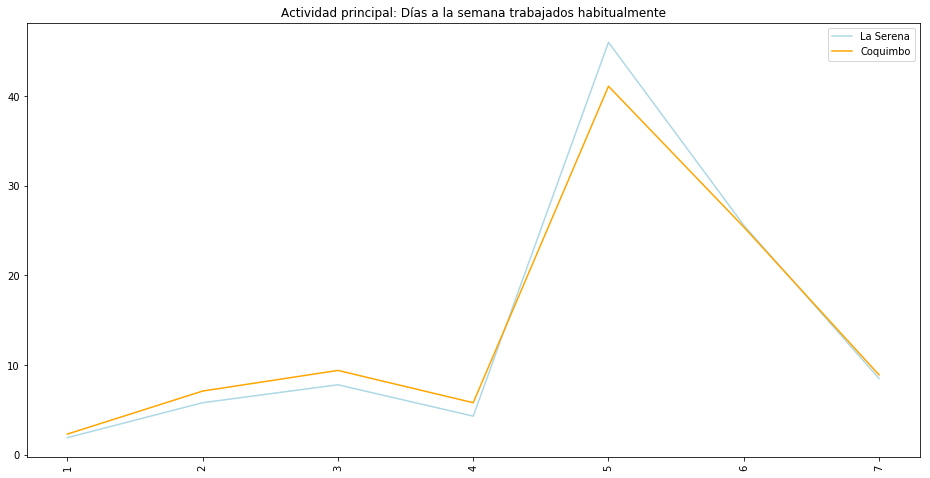

In [67]:
columna = 'c2_1_2'
titulo = 'Actividad principal: Días a la semana trabajados habitualmente'

ids = pd.unique(df_empleo[columna])
codigos = {v:v for v in ids}
codigos['999'] = 'No sabe'
del codigos['999']
del codigos[' ']

ids_codigos = sorted(codigos.keys())
x_labels = [codigos[k] for k in ids_codigos]
y_la_serena = calcular_porcentajes(ids_codigos, df_empleo_la_serena, columna)
y_coquimbo = calcular_porcentajes(ids_codigos, df_empleo_coquimbo, columna)

generar_grafico_linea(x_labels, y_la_serena, y_coquimbo, titulo)

#### Actividad principal: Días a la semana contratados o acordados

In [68]:
def obtener_ids_ordenados(columna):
    """Devuelve un arreglo ordenado de elementos de tipo `str`"""
    ids_aux = sorted(pd.unique(df_empleo[columna]))
    valores = np.sort([int(v) for v in ids_aux[1:]])
    ids = [ids_aux[0]] + [str(v) for v in valores]
    return ids


def mostrar_ids(ids):
    for v in ids:
        print("'"+v+"'", end='\t')

In [69]:
columna = 'c3_2'
titulo = 'Actividad principal: Días a la semana contratados o acordados'

In [70]:
ids = obtener_ids_ordenados(columna)
mostrar_ids(ids)

' '	'1'	'2'	'3'	'4'	'5'	'6'	'7'	'999'	

In [71]:
# eliminamos los elementos que no aportan información
ids.pop(-1)
ids.pop(0);

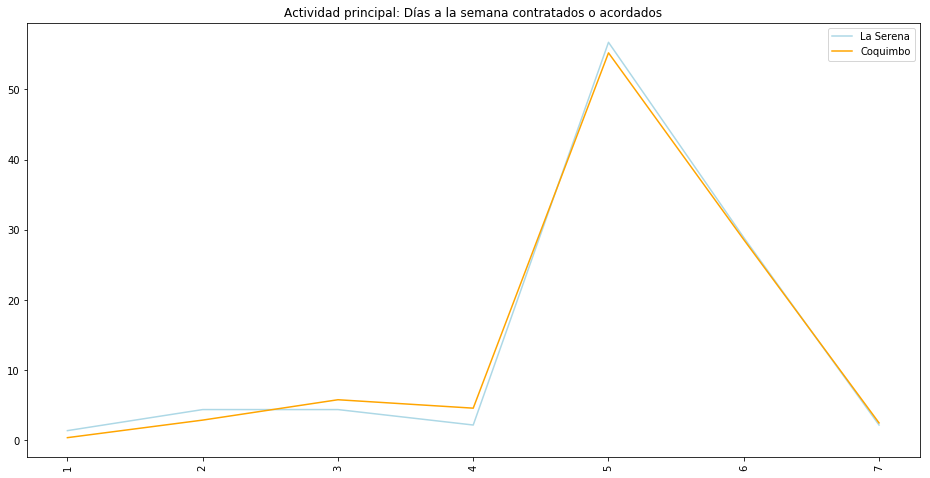

In [72]:
codigos = {v:v for v in ids}
ids_codigos = ids

x_labels = [codigos[k] for k in ids_codigos]
y_la_serena = calcular_porcentajes(ids_codigos, df_empleo_la_serena, columna)
y_coquimbo = calcular_porcentajes(ids_codigos, df_empleo_coquimbo, columna)

generar_grafico_linea(x_labels, y_la_serena, y_coquimbo, titulo)

#### Actividad principal: Total horas semanales trabajadas habitualmente

In [73]:
columna = 'c2_1_3'
titulo = 'Actividad principal: Total horas semanales trabajadas habitualmente'

In [74]:
ids = obtener_ids_ordenados(columna)
mostrar_ids(ids)

' '	'1'	'2'	'3'	'4'	'5'	'6'	'7'	'8'	'9'	'10'	'11'	'12'	'13'	'14'	'15'	'16'	'17'	'18'	'19'	'20'	'21'	'22'	'23'	'24'	'25'	'26'	'27'	'28'	'29'	'30'	'31'	'32'	'33'	'34'	'35'	'36'	'37'	'38'	'39'	'40'	'41'	'42'	'43'	'44'	'45'	'46'	'47'	'48'	'49'	'50'	'51'	'52'	'53'	'54'	'55'	'56'	'57'	'58'	'59'	'60'	'61'	'63'	'64'	'65'	'66'	'67'	'68'	'69'	'70'	'71'	'72'	'73'	'74'	'75'	'76'	'77'	'78'	'80'	'81'	'82'	'84'	'86'	'87'	'88'	'90'	'91'	'92'	'93'	'94'	'96'	'98'	'99'	'100'	'105'	'108'	'112'	'114'	'119'	'140'	

In [75]:
# eliminamos los elementos que no aportan información
#ids.pop(-1)
ids.pop(0);

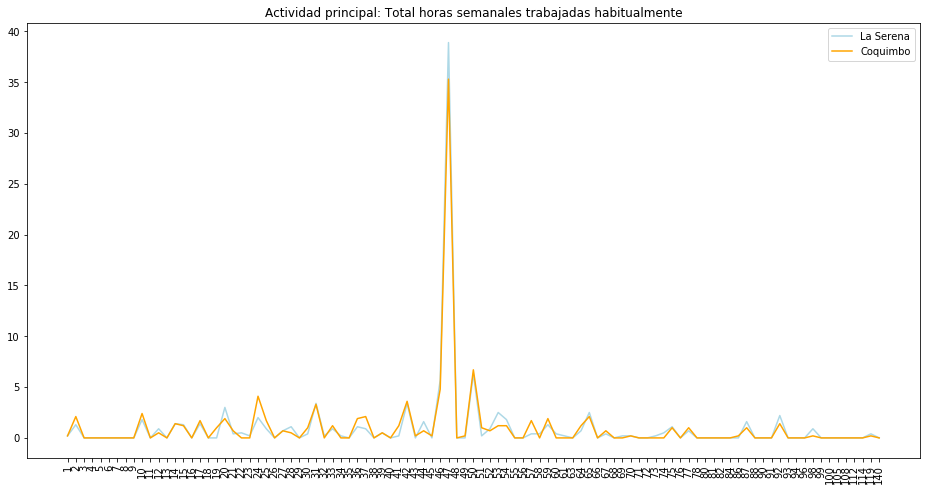

In [76]:
codigos = {v:v for v in ids}
ids_codigos = ids

x_labels = [codigos[k] for k in ids_codigos]
y_la_serena = calcular_porcentajes(ids_codigos, df_empleo_la_serena, columna)
y_coquimbo = calcular_porcentajes(ids_codigos, df_empleo_coquimbo, columna)

generar_grafico_linea(x_labels, y_la_serena, y_coquimbo, titulo)

#### Actividad principal: ¿Le pagan habitualmente las horas extras?

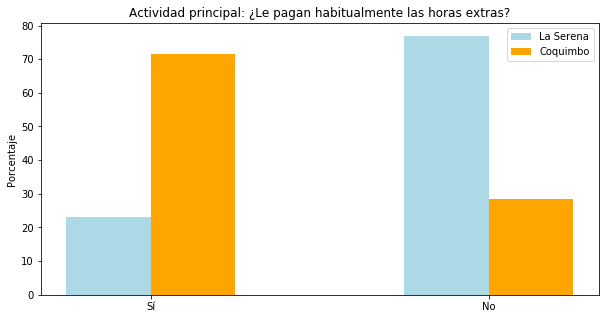

In [77]:
nombre_columna = 'c4'
titulo = 'Actividad principal: ¿Le pagan habitualmente las horas extras?'
x_labels = np.array(['Sí', 'No'])
indices_filas_a_borrar = [0]

y_la_serena = empleo_porcentual(df_empleo_la_serena, nombre_columna, indices_filas_a_borrar)
y_coquimbo = empleo_porcentual(df_empleo_coquimbo, nombre_columna, indices_filas_a_borrar)

generar_grafico_barras(x_labels, y_la_serena, y_coquimbo, titulo)

#### Rama de Actividad Económica de la empresa o institución que le paga el sueldo, o de la que es dueña la persona ocupada.

In [78]:
columna = 'r_p_rev4cl_caenes'
titulo = (
    'Rama de Actividad Económica de la empresa o institución que le paga el sueldo,\n'
    'o de la que es dueña la persona ocupada.'
)
codigos = {
    '1': 'Agricultura, silvicultura y pesca',
    '2': 'Explotación de minas y canteras',
    '3': 'Industria Manufacturera',
    '4': 'Suministro de electricidad, gas,\nvapor y aire acondicionado',
    '5': 'Suministro de agua; alcantarillado,\ngestión de desechos\ny actividades de saneamiento',
    '6': 'Construcción',
    '7': 'Comercio',
    '8': 'Transporte y almacenamiento',
    '9': 'Alojamiento y servicios de comida',
    '10': 'Información y COMunicación',
    '11': 'Actividades financieras y de seguros',
    '12': 'Actividades inmobiliarias',
    '13': 'Actividades profesionales,\ncientíficas y técnicas',
    '14': 'Actividades administrativas\ny servicios de apoyo',
    '15': 'Administración pública',
    '16': 'Enseñanza',
    '17': 'Servicios sociales\ny relacionados con la salud humana',
    '18': 'Artes, entretenimiento y recreación',
    '19': 'Otras actividades de servicios',
    '20': 'Actividades de los hogares\nen calidad de empleadores',
    '21': 'Actividades de organizaciones\ny órganos extraterritoriales',
}

In [79]:
np.sort(pd.unique(df_empleo[columna]))

array([' ', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [80]:
ids = obtener_ids_ordenados(columna)
mostrar_ids(ids)

' '	'1'	'2'	'3'	'4'	'5'	'6'	'7'	'8'	'9'	'10'	'11'	'12'	'13'	'14'	'15'	'16'	'17'	'18'	'19'	'20'	'21'	

In [81]:
# eliminamos los elementos que no aportan información
#ids.pop(-1)
ids.pop(0);

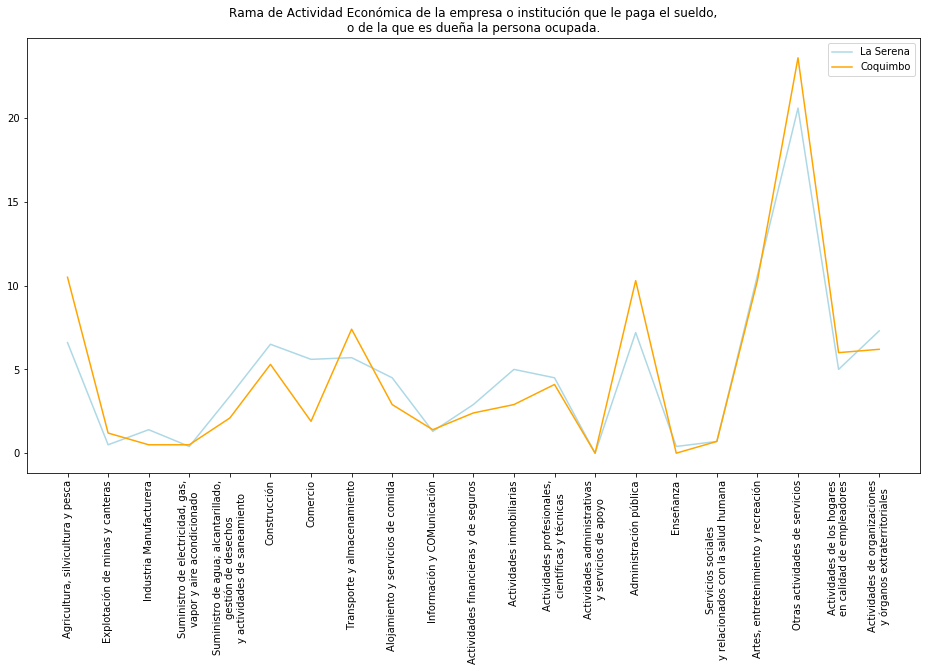

In [82]:
#codigos = {v:v for v in ids}
ids_codigos = ids

x_labels = [codigos[k] for k in ids_codigos]
y_la_serena = calcular_porcentajes(ids_codigos, df_empleo_la_serena, columna)
y_coquimbo = calcular_porcentajes(ids_codigos, df_empleo_coquimbo, columna)

generar_grafico_linea(x_labels, y_la_serena, y_coquimbo, titulo)

#### Formalidad de la ocupación

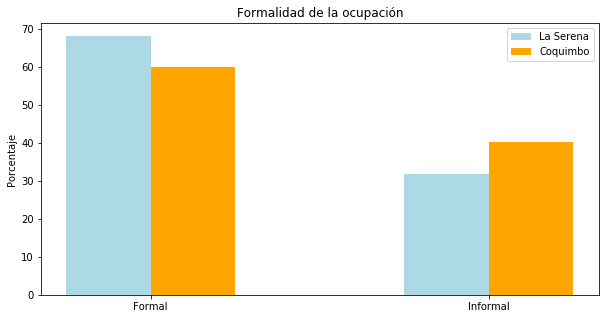

In [83]:
nombre_columna = 'ocup_form'
titulo = 'Formalidad de la ocupación'
x_labels = np.array(['Formal', 'Informal'])
indices_filas_a_borrar = [0]

y_la_serena = empleo_porcentual(df_empleo_la_serena, nombre_columna, indices_filas_a_borrar)
y_coquimbo = empleo_porcentual(df_empleo_coquimbo, nombre_columna, indices_filas_a_borrar)

generar_grafico_barras(x_labels, y_la_serena, y_coquimbo, titulo)

#### Rangos de edad

In [84]:
columna = 'tramo_edad'
titulo = 'Tramo de edad (en quinquenios).'
codigos = {
    '1': '15 a 19 años',
    '2': '20 a 24 años',
    '3': '25 a 29 años',
    '4': '30 a 34 años',
    '5': '35 a 39 años',
    '6': '40 a 44 años',
    '7': '45 a 49 años',
    '8': '50 a 54 años',
    '9': '55 a 59 años',
    '10': '60 a 64 años',
    '11': '65 a 69 años',
    '12': '70 años o más',
}

In [85]:
np.sort(pd.unique(df_empleo[columna]))

array([' ', '1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [86]:
ids = obtener_ids_ordenados(columna)
mostrar_ids(ids)

' '	'1'	'2'	'3'	'4'	'5'	'6'	'7'	'8'	'9'	'10'	'11'	'12'	

In [87]:
# eliminamos los elementos que no aportan información
#ids.pop(-1)
ids.pop(0);

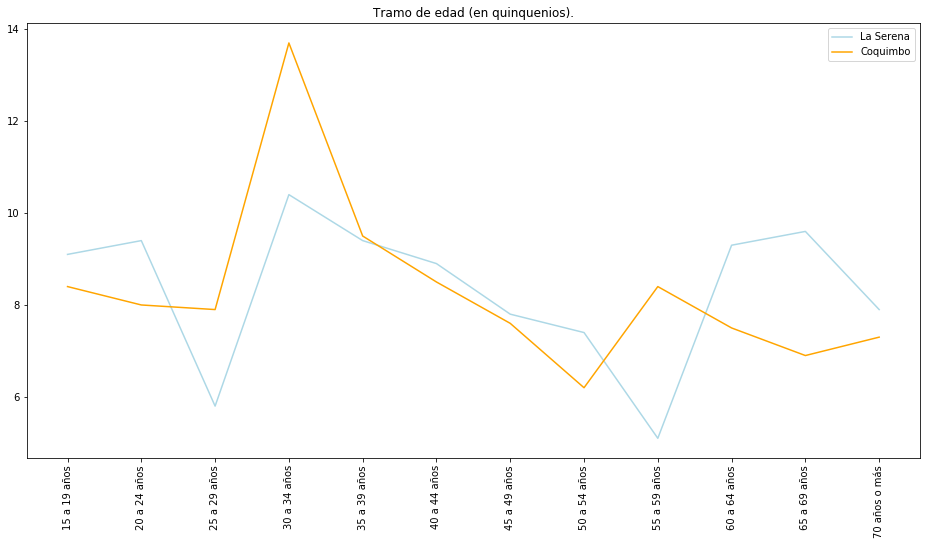

In [88]:
#codigos = {v:v for v in ids}
ids_codigos = ids

x_labels = [codigos[k] for k in ids_codigos]
y_la_serena = calcular_porcentajes(ids_codigos, df_empleo_la_serena, columna)
y_coquimbo = calcular_porcentajes(ids_codigos, df_empleo_coquimbo, columna)

generar_grafico_linea(x_labels, y_la_serena, y_coquimbo, titulo)

### Observaciones

#### Diferencia insignificante

Existen diferencias insignificantes en los siguientes aspectos:

- Tipos de jornada
- Categorías de ocupación
- Condición de Actividad Económica General
- Actividad principal: Días a la semana contratados o acordados
- Actividad principal: Total horas semanales trabajadas habitualmente
    - acá es necesario recalcar que la mayoria de gente, tanto en La Serena como en Coquimbo, trabaja muy cerca del límite legal de horas semanales (45 horas)
- Formalidad de la ocupación (formal o informal)

#### Diferencia significativa

Existen diferencias ***significativas*** en los siguientes aspectos:

- Clasificacion Internacional de Nivel Educacional
    - Educación primaria: diferencia del 20% aprox, Coquimbo sobre La Serena
    - Educación universidaria: dif de 50%, La Serena sobre Coquimbo
- Actividad principal: Días a la semana trabajados habitualmente
    - La mayoría de la gente trabaja 5 a 6 días a la semana, y en La Serena se trabaja algo más que en Coquimbo
- Actividad principal: ¿Le pagan habitualmente las horas extras?
    - Acá hay una diferencia notable: En Coquimbo es mucho más regularizada o justa la situación que en La Serena. En La Serena solo cerca de un 25% de las personas se les paga las horas extras, mientras que en Coquimbo es cerca de un 70%.
- Rama de Actividad Económica de la empresa o institución que le paga el sueldo, o de la que es dueña la persona ocupada.
    - En general, no hay mayores diferencias. Sin embargo, hay ciertas actividades que son mayormente ocupadas por una ciudad con respecto a otra:
        - agricultura, silvicultura y pezca: Coquimbo
        - administración pública: Coquimbo
        - comercio: La Serena
        - actividades inmobiliarias: La Serena
- Rangos de edad
    - En general, hay mayor cantidad de gente joven trabajando en Coquimbo con respecto a La Serena, y en La Serena hay mayor cantidad de gente adulta de la tercera edad (60 años en adelante) con respecto a Coquimbo.

# Conclusions

En base a las observaciones realizadas (tomando en cuenta los datos disponibles) se puede concluir que en ciertos aspectos hay similaridades, pero en otros no, por lo cual se hará incapié en las diferencias significativas.

* **Salud**:
    * *establecimientos de salud*: La Serena contiene significativamente más establecimientos que Coquimbo
    * *farmacias*: en La Serena hay más farmacias, pero en Coquimbo están más distribuidas y no tan centralizadas como en La Serena
    * **ganador (winnner)**: La Serena
* **Educación**:
    * *pago de matrícula*: La Serena tiene una mayor cantidad de establecimientos educacionales de pago con respecto a Coquimbo
    * *pago de mensualidad*: La Serena tiene una mayor cantidad de establecimientos educacionales de pago con respecto a Coquimbo
    * **ganador (winnner)**: La Serena
* **Delitos**:
    * *robos sin violencia*: En La Serena ocurren más robos sin violencia que en Coquimbo
    * *violencia intrafamiliar*: en Coquimbo ocurren más situaciones de violencia intrafamiliar que en La Serena
    * **ganador (winnner)**: empate
* **Empleo**:
    * La mayoría de la gente, tanto en La Serena como en Coquimbo, trabaja una cantidad de horas muy cerca del límite legal (45 horas).
    * La Serena tiene más gente con educación universitaria que Coquimbo
    * En Coquimbo, cerca del 75% de la gente se les pagan sus horas extras, en La Serena ocurre todo lo contrario
    * sobre las áreas de las actividades realizadas, existen ciertas preferencias:        
        * comercio: La Serena
        * actividades inmobiliarias: La Serena
        * agricultura, silvicultura y pezca: Coquimbo
        * administración pública: Coquimbo
    * Coquimbo tiene mayor cantidad de gente joven trabajando con respecto a La Serena
    * **ganador (winnner)**: 
        * con respecto a formación profesional y estudios educacionales, La Serena
        * con respecto al pago de horas extras, Coquimbo


<div style="background-color: #55FF55">
Por tanto, <b>la ciudad con mejores características a nivel general es La Serena</b>.
</div>